In [26]:
from Beamformer_DAS import beamforimer_DAS
import utils
# from acoular import MicGeom
import numpy as np
from scipy.io import wavfile
import os


LOOK_DIRECTION = 0
SAMPLING_RATE = 16000
FFT_LENGTH = 2048
FFT_SHIFT = 1024
SOUND_SPEED = 343
N = 4
ELEMENT_DISTANCE = 0.15/(N-1)
# ELEMENT_DISTANCE = 0.03

Test signal

In [27]:
SIG_FREQ = 4000
WAVE_LENGTH = SOUND_SPEED / SIG_FREQ
theta = np.deg2rad(np.arange(-90, 90, 0.1).reshape([1, -1])) # every angle for filter curve
d = np.array([ELEMENT_DISTANCE]) * np.ones([N,1]) # sensor distance
n = np.arange(0,N,1).reshape([-1,1]) # N array from 0 to N-1
a = np.mat(np.exp(1j * 2* np.pi * np.sin(theta) * n * d / WAVE_LENGTH))

print(a.shape)

(4, 1800)


DAS beamformer

In [28]:
ds_beamformer = beamforimer_DAS(number_of_mic=N, mic_distance=ELEMENT_DISTANCE, sound_speed=SOUND_SPEED, sampling_rate=SAMPLING_RATE, fft_length=FFT_LENGTH, fft_shift=FFT_SHIFT)

beamformer = ds_beamformer.get_single_steering_vector(LOOK_DIRECTION, SIG_FREQ)

B = beamformer.T * a
B = np.abs(B) / np.max(np.abs(B)) # normalization

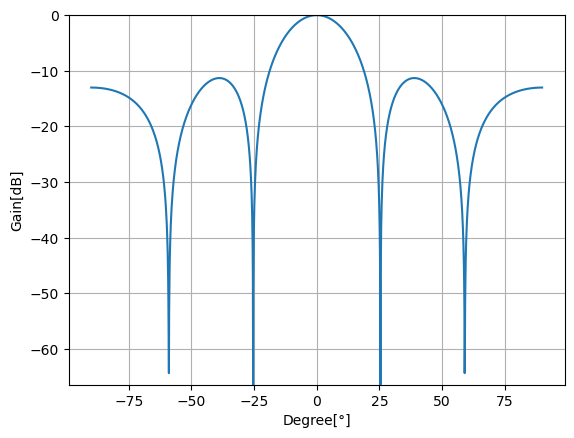

In [29]:
import matplotlib.pyplot as plt

# Define Data

x=np.arange(-90, 90, 0.1).reshape([-1])
y = []
for ele in np.arange(B.shape[1]):
    y.append(B[0,ele])
# Plot

plt.plot(x, 20 * np.log10(y))
plt.xlabel('Degree[°]')
plt.ylabel('Gain[dB]')
plt.ylim([min(20 * np.log10(y)),0])
plt.grid(True)
# Display

plt.show()